In [1]:
# 导入必要的库
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# 避免一些烦人的提示和警
# 导入matplotlib库-绘图库
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
# 导入波士顿房价的数据集
data=pd.read_csv('house_data.csv')

In [3]:
# 数据预处理
X=data.drop('MEDV',axis=1)
y=data['MEDV']

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 标准化特征
X_scaled = scaler.fit_transform(X)  
# 添加截矩阵项，即特征矩阵X中加入一列全是1的列
X_b=np.c_[np.ones(X_scaled.shape[0]),X_scaled]
# X_b 为加了截距项的特征矩阵

## 最小二乘法
- 最小二乘法求解公式
$$
\theta = (X^T X)^{-1} X^T y
$$
- 最小二乘法代价函数
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x_{(i)}) - y_{(i)})^2
$$

In [5]:
# 使用最小二乘法计算线性回归的最佳参数
# 计算转置矩阵 X_b^T
X_b_T = X_b.T
# 计算 X_b^T * X_b
X_b_T_X_b = X_b_T.dot(X_b)
# 计算 (X_b^T * X_b) 的逆
X_b_T_X_b_inv = np.linalg.inv(X_b_T_X_b)
# 计算 X_b^T * y，-dot() 内积，对应元素相乘求和
X_b_T_y = X_b_T.dot(y)
# 最后计算参数 theta
theta_best = X_b_T_X_b_inv.dot(X_b_T_y)
# 打印最小二乘法得到的模型参数 
print(theta_best)

[ 2.25328063e+01 -9.28146064e-01  1.08156863e+00  1.40899997e-01
  6.81739725e-01 -2.05671827e+00  2.67423017e+00  1.94660717e-02
 -3.10404426e+00  2.66221764e+00 -2.07678168e+00 -2.06060666e+00
  8.49268418e-01 -3.74362713e+00]


In [6]:
# 计算最小二乘法中的代价函数值
# 样本数量
m=len(y)
# 预测值  h(x)=X_b*theta
predictions=X_b.dot(theta_best)
# 计算代价函数数值
cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
print(cost)

10.947415590864601


In [7]:
print(predictions)

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211 18.99949651 21.58679568
 20.90652153 19.55290281 19.28348205 19.29748321 20.52750979 16.91140135
 16.17801106 18.40613603 12.52385753 17.67103669 15.83288129 13.80628535
 15.67833832 13.38668561 15.46397655 14.70847428 19.54737285 20.8764282
 11.45511759 18.05923295  8.81105736 14.28275814 13.70675891 23.81463526
 22.34193708 23.10891142 22.91502612 31.35762569 34.21510225 28.02056414
 25.20386628 24.60979273 22.94149176 22.09669817 20.42320032 18.03655088
  9.10655377 17.20607751 21.28152535 23.97222285 27.6558508  24.04901809
 15.3618477  31.15264947 24.85686978 33.10919806 21.77537987 21.08493555
 17.8725804  18.51110208 23.98742856 22.55408869 23.37308644 30.36148358
 25.53056512 21.11338564 17.42153786 20.78483633 25.20148859 21.7426577
 24.55744957 24.04295712 25.50499716 23.9669302  22.94545403 23.35699818
 21.26198266 22.42817373 28.40576968 26.99486086 26.0

# 梯度下降算法
$$
\theta = \theta - \alpha \nabla J(\theta)
$$


In [8]:
# 多次用到代价函数，将其封装为函数
def cost_function(theta_best, X_b, y):
    # 样本数量
    m=len(y)
    # 预测值  h(x)=X_b*theta
    predictions=X_b.dot(theta_best)
    # 计算代价函数数值
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    # print(cost)
    return cost

# cost_function(theta_best, X, y)    测试代码，看函数能否运行
# 进行梯度下降算法优化

# 定义学习率
learn_rate=0.01
# 定义迭代次数
iterations=1000
# 随机初始化权重
theta_initial = np.random.randn(X_b.shape[1])

def gradient_descent(X_b, y, theta_initial, learn_rate, iterations):
    
    # 进行梯度下降法优化模型参数
    
    m = len(y)  # 样本数量
    
    theta_best=theta_initial.copy()
    
    # 定义一个辅助列表 
    # 存储每次迭代的代价函数值
    cost_Front= []  
    
    for _ in range(iterations):
        predictions = X_b.dot(theta_best)  # 预测值
        errors = predictions - y  # 预测误差
        theta_best =theta_best-(1 / m) * learn_rate * (X_b.T.dot(errors))  # 更新参数
        cost = cost_function(theta_best,X_b, y)   # 计算新的代价函数值
         # 存储代价函数值
        cost_Front.append(cost)  

    return theta_best, cost_Front

# 使用梯度下降法进行参数优化
theta_gradient, cost_Front = gradient_descent(X_b, y, theta_initial, learn_rate, iterations)

# 打印梯度下降法得到的模型参数
print(f"梯度下降算法得到的权重：, {theta_gradient}")

梯度下降算法得到的权重：, [ 2.25318301e+01 -8.20465702e-01  8.42120874e-01 -2.89844552e-01
  7.44372524e-01 -1.84164454e+00  2.80026982e+00  1.66433193e-02
 -2.87411601e+00  1.49949307e+00 -7.80355867e-01 -2.02358004e+00
  8.51292608e-01 -3.70682738e+00]


In [9]:
# 使用梯度下降算法得到的参数进行预测
predictions_gradient = X_b.dot(theta_gradient)

# 打印结果
print(f"预测值：{predictions_gradient}")

预测值：[30.66670683 25.02795609 30.68251387 28.81872924 28.19396727 25.37635685
 23.02377767 19.66175215 11.62246412 19.07652904 19.21317181 21.68413394
 20.91407073 19.79577722 19.53367426 19.49843204 20.74472592 17.14527381
 16.25278267 18.52545109 12.66877782 17.86946833 16.08906404 14.01836207
 15.92275386 13.57979466 15.71065348 14.98706703 19.88240026 21.21920841
 11.67994396 18.29545039  9.07984545 14.43492105 13.94025552 23.59145839
 22.11375827 22.93174463 22.75845241 30.7834282  33.70654367 27.92425071
 25.00439831 24.42675452 22.73990495 21.76260335 20.1283665  17.86907564
  8.90688246 16.99420405 20.97149561 23.6664099  27.40413689 23.72135934
 16.54109202 30.49217939 25.25341983 32.41285173 21.42334765 20.60713149
 17.41234874 18.05062431 23.62186885 22.34295319 23.7187482  30.21679251
 25.32305026 21.55387521 17.83621413 21.22987359 25.13603197 21.61125917
 24.42267783 23.95208245 25.79246195 24.29134508 23.23191947 23.61691616
 21.6488595  22.68042075 28.35096042 26.9269259

# 数据可视化

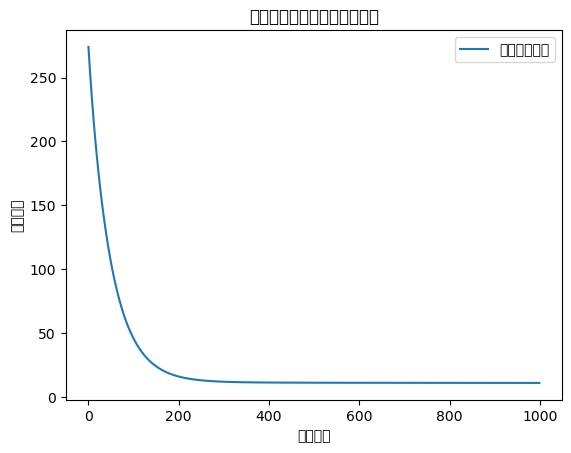

In [10]:
# 绘制梯度下降算法的代价函数变化
plt.plot(range(iterations), cost_Front,label='梯度下降算法')
plt.xlabel('迭代次数')
plt.ylabel('代价函数')
plt.title('梯度下降算法的代价函数变化')
plt.legend()
plt.show()

# 最小二乘法-数据比较可视化

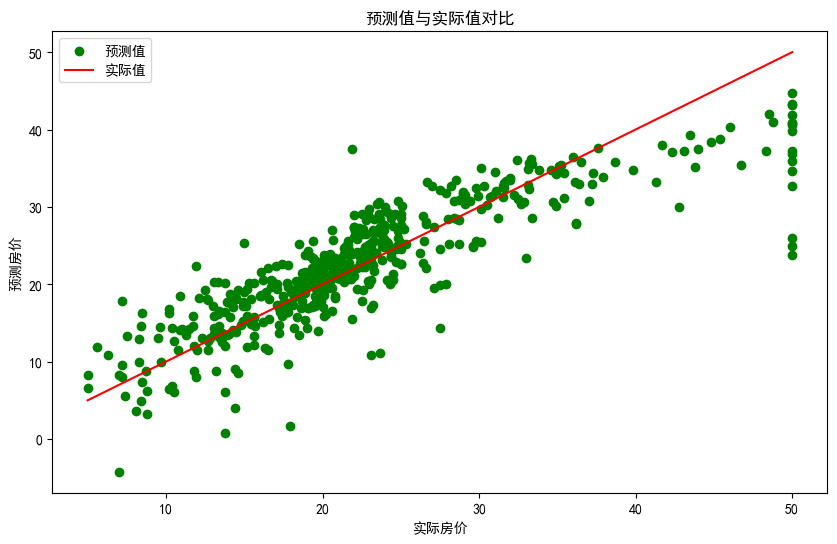

In [11]:
# 绘图直观比较预测值与真实值的偏差
plt.figure(figsize=(10, 6))

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来显示正常负号

plt.scatter(y, predictions, color='green', label='预测值')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='实际值')
plt.xlabel('实际房价')
plt.ylabel('预测房价')
plt.title('预测值与实际值对比')
# 添加图例标签
plt.legend()   
plt.show()

# 梯度下降算法-数据比较可视化

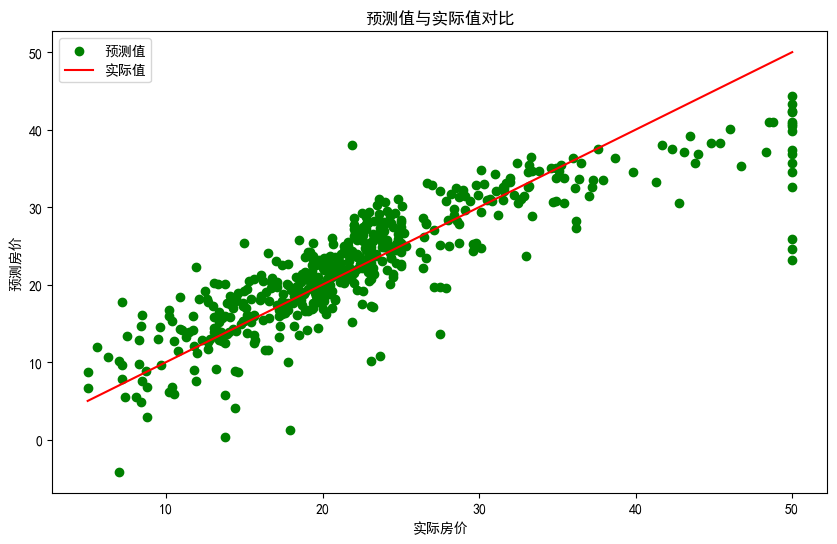

In [12]:
plt.figure(figsize=(10, 6))

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来显示正常负号

plt.scatter(y, predictions_gradient, color='green', label='预测值')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='实际值')
plt.xlabel('实际房价')
plt.ylabel('预测房价')
plt.title('预测值与实际值对比')
# 添加图例标签
plt.legend()   
plt.show()